# Introduction to Machine Learning - Linear Regression

In [7]:
# Import all necessary packages/libraries
import numpy as np              # numerical python for math operations
import matplotlib.pyplot as plt # for visualializations

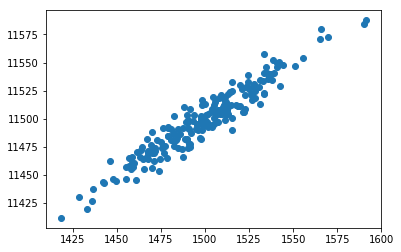

In [47]:
# Generate sample data with some noise and plot it
sample_x = np.random.normal(1500,30,200)
noise = np.random.normal(0,10,(200,))
sample_y = 1*sample_x + 10000 + noise
plt.scatter(sample_x, sample_y)
plt.show()